Predict weather the passenger survived or not

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

// importing data set in pandas

In [164]:
df = pd.read_csv('titanic.csv')

In [165]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [166]:
df.shape

(418, 12)

In [167]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [169]:
df.drop(columns='Cabin', axis=1, inplace=True)

In [170]:
df.shape

(418, 11)

# Handling the Missing Values in a Dataset

// handling missing age value

In [171]:
df.Age

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [172]:
mean_age = df['Age'].mean()
df['Age'].fillna(mean_age, inplace=True)

In [173]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

// Handling missing fare value

In [174]:
df['Fare']

0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
         ...   
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418, dtype: float64

In [175]:
# the fair depends upon the class in which the passenger is travelling-

df[df['Fare'].isna()]['Pclass']

152    3
Name: Pclass, dtype: int64

In [176]:
mean_fare_for_class3 = df[df['Pclass']==3]['Fare'].mean()
mean_fare_for_class3

12.459677880184334

In [177]:
df['Fare'].fillna(mean_fare_for_class3, inplace=True)

# Data visualization

In [178]:
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

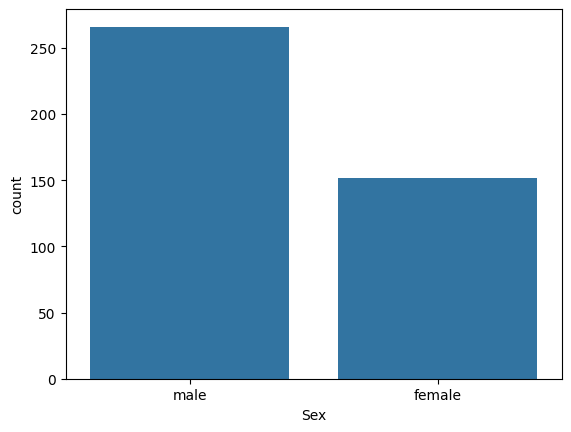

In [179]:
# male passengers and female passengers
sns.countplot(x = 'Sex', data=df)

In [180]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

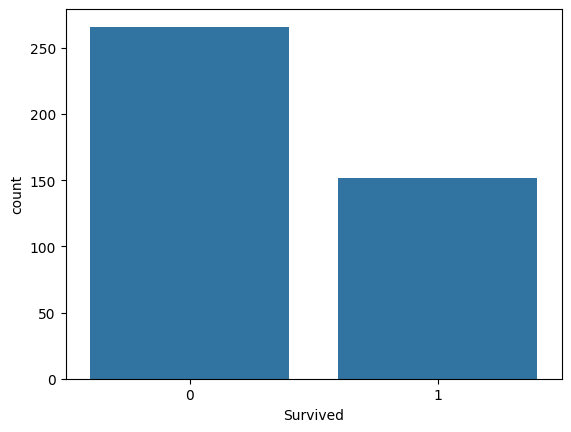

In [181]:
sns.countplot(x = 'Survived', data=df)

<Axes: xlabel='Sex', ylabel='count'>

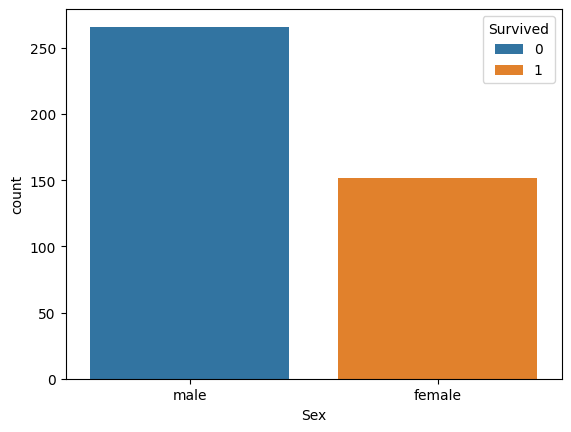

In [182]:
sns.countplot(x = 'Sex', hue='Survived', data=df )

In [183]:
df['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [184]:
df['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

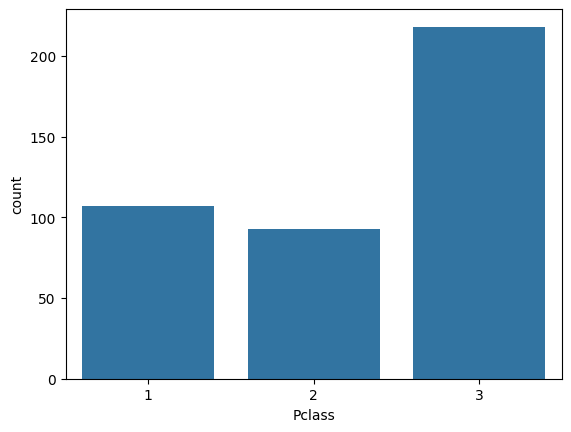

In [185]:
sns.countplot(x = 'Pclass', data=df)

<Axes: xlabel='Pclass', ylabel='count'>

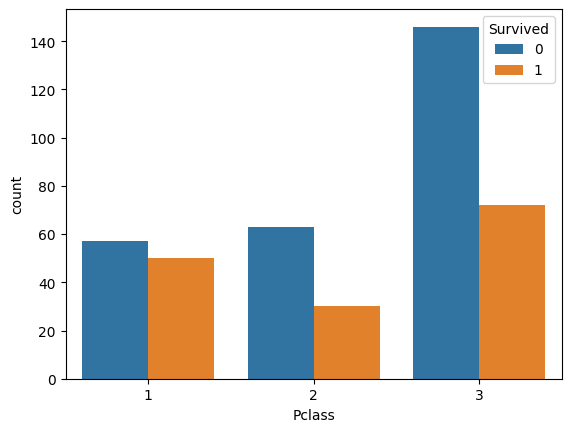

In [186]:
sns.countplot(x = 'Pclass', hue='Survived', data=df)

# Categorical Data Encoding

In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [188]:
#  Categorical columns are = 
#  Sex = male, female
#  Embarked = C, Q, S

In [189]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [190]:
df['Embarked'].unique()

array(['Q', 'S', 'C'], dtype=object)

In [191]:
df['Sex'] = df['Sex'].map({'male' : 0, 'female' : 1})
df['Embarked'] = df['Embarked'].map({'Q' : 0, 'S' : 1, 'C':2})

In [192]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
60,952,0,3,"Dika, Mr. Mirko",0,17.00000,0,0,349232,7.8958,1
41,933,0,1,"Franklin, Mr. Thomas Parham",0,30.27259,0,0,113778,26.5500,1
407,1299,0,1,"Widener, Mr. George Dunton",0,50.00000,1,1,113503,211.5000,2
330,1222,1,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",1,48.00000,0,2,C.A. 33112,36.7500,1
160,1052,1,3,"Smyth, Miss. Julia",1,30.27259,0,0,335432,7.7333,0


In [193]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [194]:
X = df.drop(columns=['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
y = df['Survived']

In [195]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.50000,0,0,7.8292,0
1,3,1,47.00000,1,0,7.0000,1
2,2,0,62.00000,0,0,9.6875,0
3,3,0,27.00000,0,0,8.6625,1
4,3,1,22.00000,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,0,30.27259,0,0,8.0500,1
414,1,1,39.00000,0,0,108.9000,2
415,3,0,38.50000,0,0,7.2500,1
416,3,0,30.27259,0,0,8.0500,1


In [196]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [198]:
model = LogisticRegression()

In [199]:
model.fit(X_train, y_train)

LogisticRegression()

In [200]:
y_train_expected = model.predict(X_train)

In [201]:
Train_accuracy = accuracy_score(y_train, y_train_expected)
Train_accuracy

1.0

In [202]:
y_test_expected = model.predict(X_test)

In [203]:
Test_accuracy = accuracy_score(y_test, y_test_expected)
Test_accuracy

1.0